In [56]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


<h3>Load the CSV file into memory</h3>

In [57]:
df = pd.read_csv('uber-raw-data-apr14.csv')

In [58]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [59]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

In [60]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


<p>Date and time helper functions</p>

In [61]:
def get_day_of_month(dt):
    return dt.day

def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

In [62]:
df['day_of_month'] = df['Date/Time'].map(get_day_of_month)
df['weekday'] = df['Date/Time'].map(get_weekday)
df['hour'] = df['Date/Time'].map(get_hour)
df.head()

,Date/Time,Lat,Lon,Base,day_of_month,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


<h3>Date Anaylsis</h3>

''

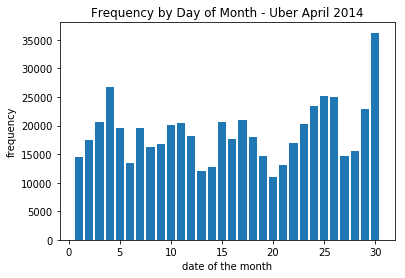

In [63]:
hist(df.day_of_month, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title("Frequency by Day of Month - Uber April 2014")
;

In [64]:
def count_rows(rows):
    return len(rows)

calls_by_date = df.groupby('day_of_month').apply(count_rows)
calls_sorted_by_date = calls_by_date.sort_values()

''

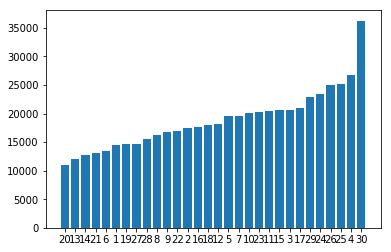

In [65]:
bar(range(1,31), calls_sorted_by_date)
xticks(range(1,31), calls_sorted_by_date.index)
;

### Analyse the hour

''

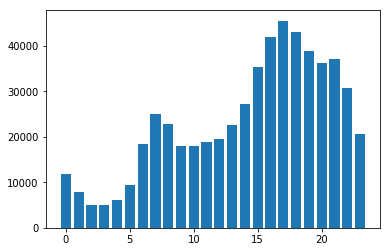

In [66]:
hist(df.hour, bins=24, rwidth=.8, range=(-.5,23.5))
;

### Analyse the weekday

''

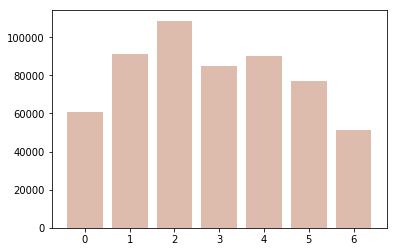

In [67]:
hist(df.weekday, bins=7, range=(-.5, 6.5), rwidth=.8, color='#AA5533', alpha=.4)
;

### Analysis hour vs day_of_month

In [68]:
hour_matrix = df.groupby('hour weekday'.split()).apply(count_rows).unstack()

''

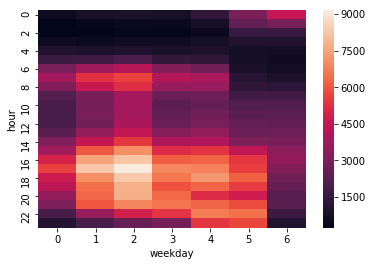

In [69]:
sns.heatmap(hour_matrix)
;

### Analysis of Latitude and Longitude

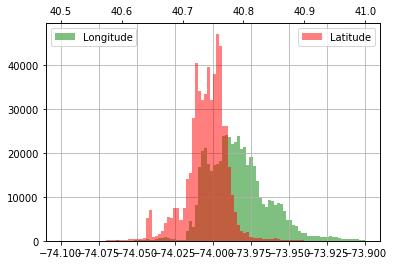

In [70]:
hist(df['Lon'], bins=100, range=(-74.1, -73.9), color='green', alpha=.5, label='Longitude')
grid()
legend(loc='upper left')
twiny()
hist(df['Lat'], bins=100, range=(40.5, 41), color='red', alpha=.5, label='Latitude')
legend(loc='best')

### Geo plot the data

''

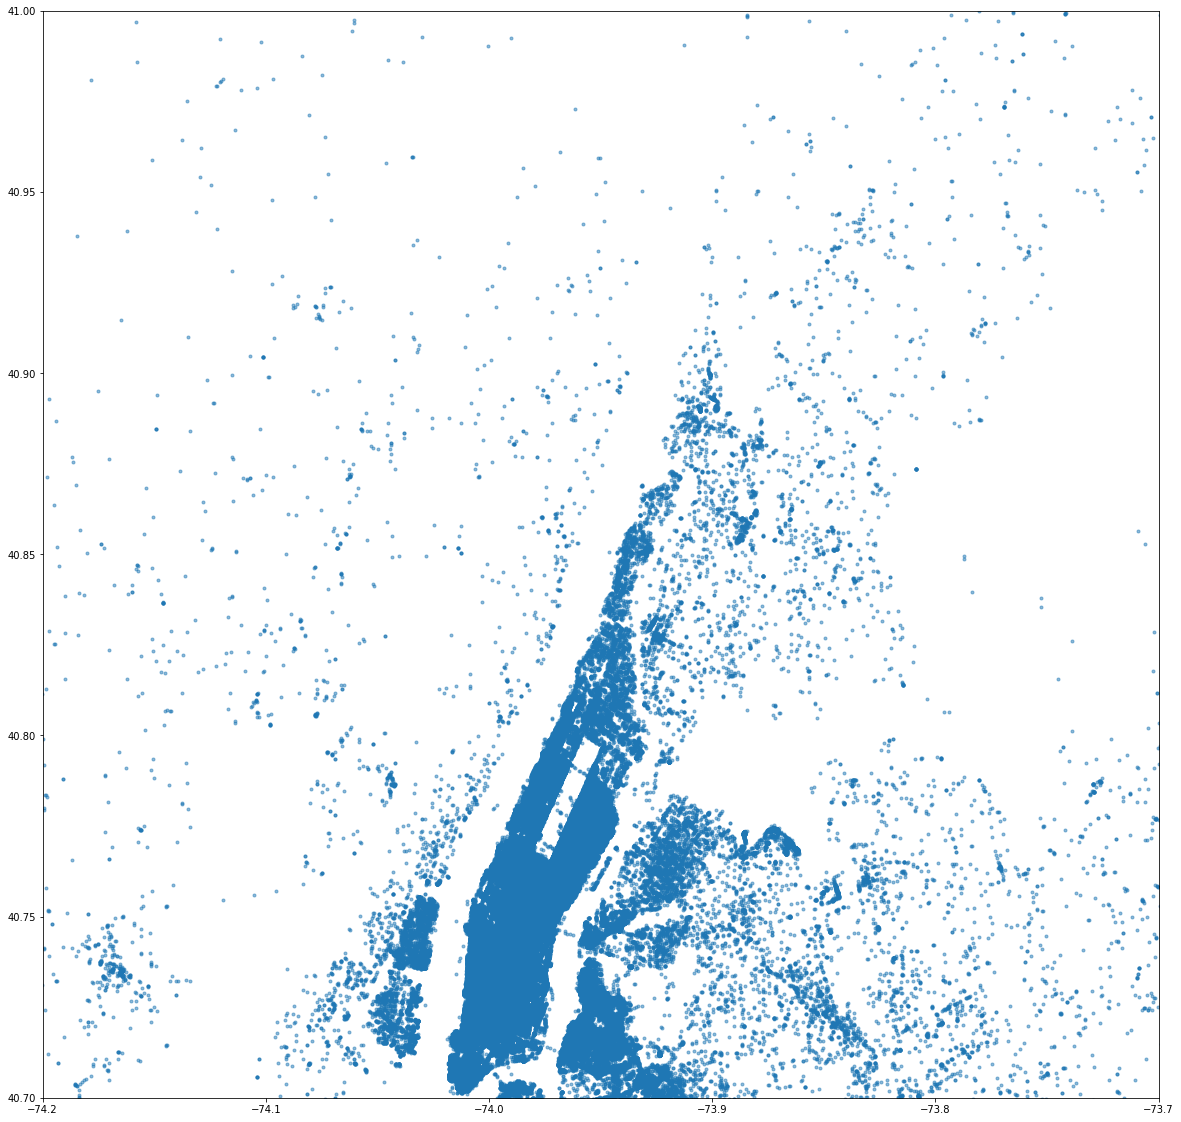

In [71]:
figure(figsize=(20, 20))
plot(df['Lon'], df['Lat'], '.', alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)
;